In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.io import wavfile
from scipy.fft import fft, fftfreq, fftshift
import scipy.io
from scipy import signal

import IPython

def cm_to_inch(value):
    return value/2.54



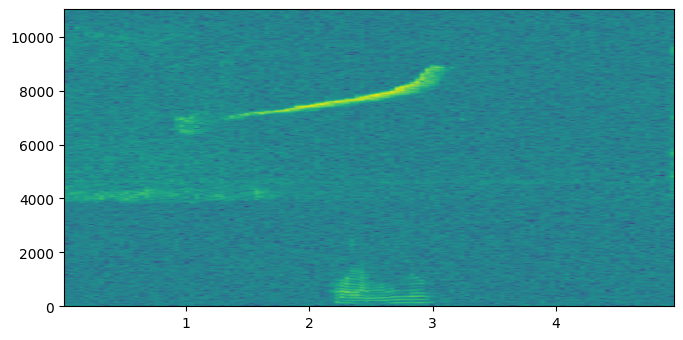

In [113]:
fs, data = scipy.io.wavfile.read('UnknownSound.wav')

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
Pxx, freqs, bins, im = plt.specgram(data, NFFT=1024, Fs=fs)

IPython.display.Audio("UnknownSound.wav")

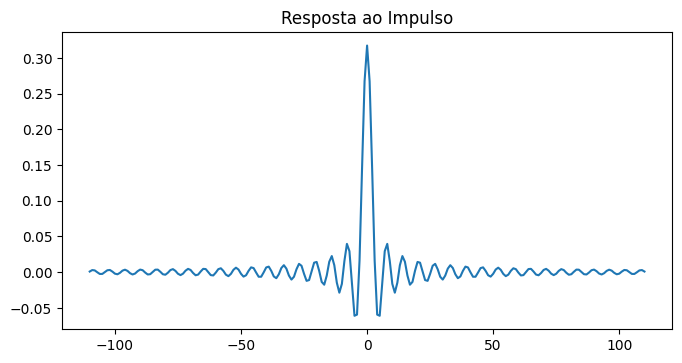

In [44]:
np.seterr(divide='ignore', invalid='ignore')

fc = 3500

wc = np.pi * fc/(fs/2)
N1 = 110
n1 = np.arange(-N1,(N1+1),1)

NSamples = len(n1)

hlp = wc/np.pi*(np.sin(wc*n1)) / (wc*n1)
hlp[n1==0] = wc / np.pi

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

plt.plot(n1,hlp)
plt.title('Resposta ao Impulso')

plt.show()

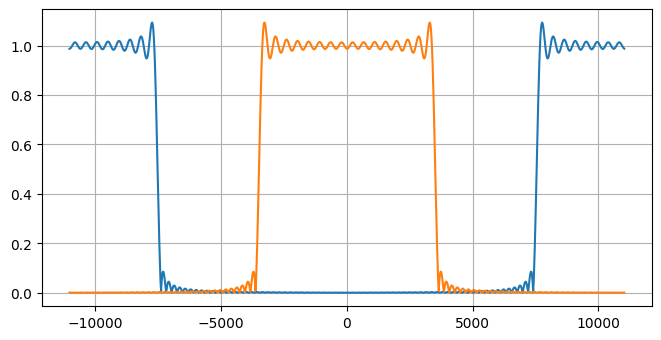

In [104]:
M = 101
M1 = -(M-1)/2
M2 = (M-1)/2

Idx = (n1>=M1) & (n1 <= M2)

w = np.ones(M)
h2 = np.array(hlp[Idx]*w)

atenuacao = 100

beta = 0.1102 * (atenuacao - 8.7)
w2 = signal.windows.kaiser(M, beta=beta)

Hw = fft(h2,1000)
#Hw = fftshift(Hw)

freq_plot = np.linspace(-fs/2, fs/2, len(Hw))

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

plt.plot(freq_plot,abs(Hw))
plt.plot(freq_plot, abs(fftshift(Hw)))
plt.grid()

plt.show()

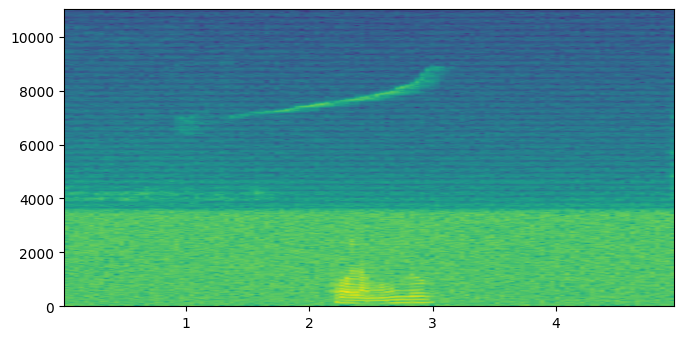

In [112]:
x1 = signal.lfilter(h2,1,data)

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
Pxx, freqs, bins, im = plt.specgram(x1, NFFT=1024, Fs=fs)

scipy.io.wavfile.write('Audio_passaBAIXA.wav', fs, x1.astype(np.int16))
IPython.display.Audio("Audio_passaBAIXA.wav")

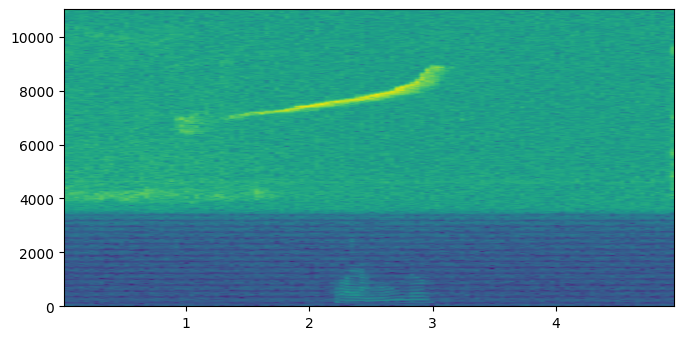

In [120]:
Pos_M = np.argmax(h2)
b_impulse = np.zeros(M);
b_impulse[Pos_M] = 1;
b_HP = b_impulse - h2

x2 = signal.lfilter(b_HP,1,data)

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
Pxx, freqs, bins, im = plt.specgram(x2, NFFT=1024, Fs=fs)

scipy.io.wavfile.write('Audio_passaALTA.wav', fs, x2.astype(np.int16))
IPython.display.Audio("Audio_passaALTA.wav")